In [3]:
import os, sys, glob, json, scipy as sp
import matplotlib.pyplot as plt
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *

In [84]:
foldpath = os.getcwd()+"/Data/Output/"
foldpath = "/home/shaunf/Documents/Computer/Code/projects/ProcaAroundKerr/GWGenerator/Data/Output/"
filenames = glob.glob(foldpath+"*.json")
data = []
for file in filenames:
    with open(file, "r") as f:
        data.append(json.load(f))
data[-1]

{'SMBHMASS': 130000,
 'SecondaryMass': 10,
 'PROCAMASS': 1e-16,
 'p0': 10.0,
 'e0': 0.2,
 'BHSpin': 1,
 'mismatch': 0.0052007464494474576,
 'faithfulness': 0.9985125245884252}

In [85]:
BHMasses = np.asarray([data[i]["SMBHMASS"] for i in range(len(data))])
ProcaMasses = np.asarray([data[i]["PROCAMASS"] for i in range(len(data))])
Faith = np.asarray([data[i]["faithfulness"] for i in range(len(data))])

interps = []
bhmasses = []
newpran = []
out = {}
for inx, b in enumerate(BHMasses):
    pmass = ProcaMasses[BHMasses==b]
    sorter = np.argsort(pmass)
    pmass = pmass[sorter]
    faith = Faith[BHMasses==b][sorter]
    if len(faith)<2:
        continue
    bhmasses.append(b)
    out[str(b)]=(pmass, faith)
    interps.append(sp.interpolate.interp1d(pmass, faith, bounds_error=False))

In [86]:
xdat = []
ydat = []
zdat = []
for inx, b in enumerate(bhmasses):
    for inx1, p in enumerate(np.arange(min(ProcaMasses), max(ProcaMasses), 1e-18)):
        xdat.append(b)
        ydat.append(p)
        zdat.append(interps[inx](p))

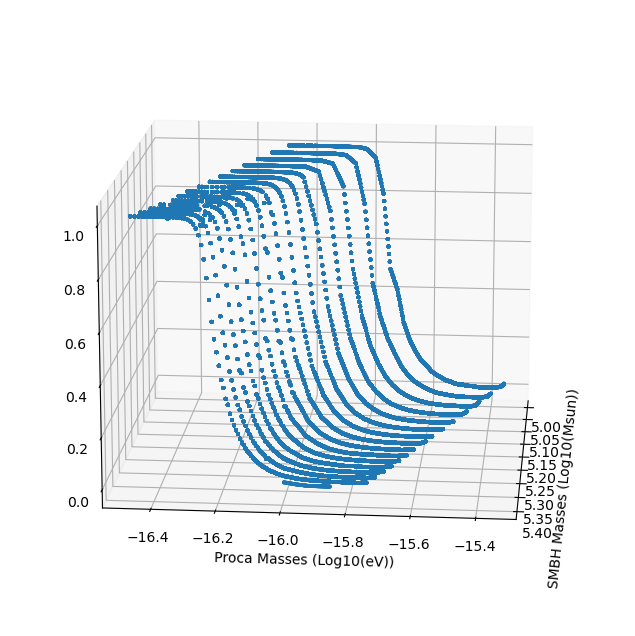

In [90]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log10(xdat), np.log10(ydat), zdat,s=3)
ax.set_ylabel("Proca Masses (Log10(eV))")
ax.set_xlabel("SMBH Masses (Log10(Msun))")
ax.view_init(15,5)

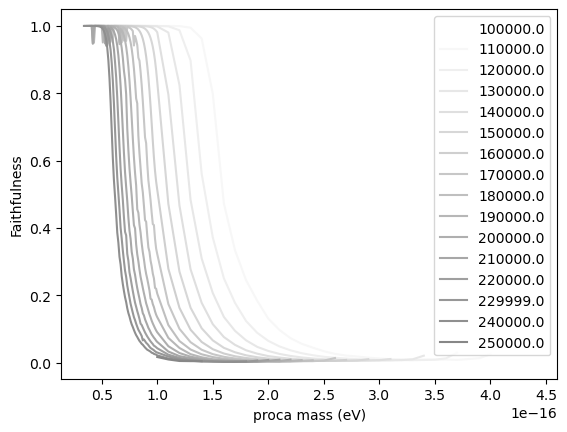

In [95]:
for inx, i in enumerate(sorted(list(map(float,out.keys())))):
    col = str(0.5*float(1-inx/len(out.keys()))+0.5)
    keystr = str(int(i))
    plt.plot(out[keystr][0], out[keystr][1], label=str(i), color=col)
    plt.xlabel(r"proca mass (eV)")
    plt.ylabel("Faithfulness")
    plt.legend()

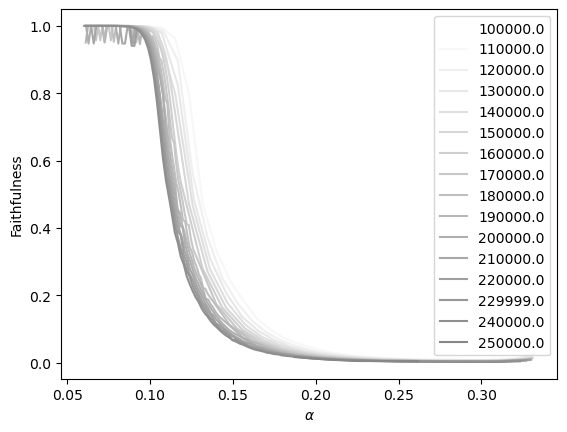

In [92]:
for inx, i in enumerate(sorted(list(map(float,out.keys())))):
    col = str(0.5*float(1-inx/len(out.keys()))+0.5)
    keystr = str(int(i))
    pmass = out[keystr][0]
    faith = out[keystr][1]
    alpha = [alphavalue(i, j) for j in pmass]
    plt.plot(alpha, faith, label=str(i), color=col)
    plt.xlabel(r"$\alpha$")
    plt.ylabel("Faithfulness")
    plt.legend()

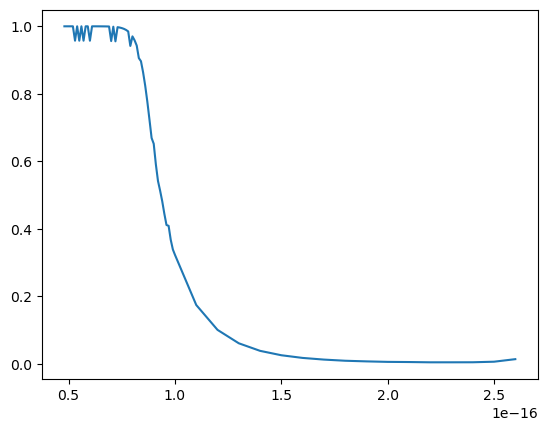

In [104]:
bhm = str(int(170000))
pm = out[bhm][0]
fatih = out[bhm][1]
plt.plot(pm,fatih)